In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dfJun = pd.read_csv("C:/Users/brand/OneDrive/Documents/IDX Exchange/CRMLSSold202406_filled.csv")
dfJul = pd.read_csv("C:/Users/brand/OneDrive/Documents/IDX Exchange/CRMLSSold202407_filled.csv")
dfAug = pd.read_csv("C:/Users/brand/OneDrive/Documents/IDX Exchange/CRMLSSold202408.csv")
dfSep = pd.read_csv("C:/Users/brand/OneDrive/Documents/IDX Exchange/CRMLSSold202409.csv")
dfOct = pd.read_csv("C:/Users/brand/OneDrive/Documents/IDX Exchange/CRMLSSold202410.csv")
dfNov = pd.read_csv("C:/Users/brand/OneDrive/Documents/IDX Exchange/CRMLSSold202411.csv")

In [5]:
dfJun.head()

,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,RanchoSoutheast,RanchoSoutheast,NaN,True,NaN,NaN,True,1250.0,543227709,pat@patowen.com,...,0.0,False,0.0,Menifee Union,92587,0.0,12197.0,NaN,True,True
1,BeverlyHillsGreaterLA,BeverlyHillsGreaterLA,NaN,True,NaN,NaN,NaN,2100000.0,531525691,andrew@epicpropertygroup.com,...,NaN,False,NaN,NaN,91206,NaN,437284.0,NaN,False,False
2,JoshuaTreeGateway,JoshuaTreeGateway,NaN,True,NaN,NaN,NaN,179000.0,531017430,bryan@jtmodern.com,...,NaN,False,NaN,NaN,92252,0.0,875556.0,NaN,True,True
3,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,14500.0,530411639,trustdee@aol.com,...,NaN,False,NaN,NaN,92345,NaN,871200.0,NaN,True,True
4,Southland,Southland,NaN,True,NaN,NaN,NaN,720000.0,526412917,karen@goldenoakrealty.com,...,NaN,False,NaN,NaN,93510,0.0,2576054.0,NaN,True,True


In [6]:
dfJun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24328 entries, 0 to 24327
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BuyerAgentAOR                 24321 non-null  object 
 1   ListAgentAOR                  24321 non-null  object 
 2   Flooring                      14543 non-null  object 
 3   ViewYN                        21898 non-null  object 
 4   WaterfrontYN                  13 non-null     object 
 5   BasementYN                    351 non-null    object 
 6   PoolPrivateYN                 20745 non-null  object 
 7   OriginalListPrice             24274 non-null  float64
 8   ListingKey                    24328 non-null  int64  
 9   ListAgentEmail                24295 non-null  object 
 10  CloseDate                     24328 non-null  object 
 11  ClosePrice                    24327 non-null  float64
 12  ListAgentFirstName            24163 non-null  object 
 13  L

In [7]:
dfJun.nunique()

BuyerAgentAOR                     55
ListAgentAOR                      55
Flooring                         153
ViewYN                             2
WaterfrontYN                       1
                                ... 
AssociationFee                  1437
LotSizeSquareFeet               9432
MiddleOrJuniorSchoolDistrict       0
latfilled                          2
lonfilled                          2
Length: 80, dtype: int64

In [8]:
with pd.option_context('display.max_rows', None):
    print(dfJun.isnull().sum())
# The vast majority of the following rows are NULL values: WaterfrontYN, BasementYN, CoListOfficeName, CoListAgentFirstName, 
# CoListAgentLastName, FireplacesTotal, AssociationFeeFrequency, AboveGradeFinishedArea, TaxAnnualAmount, ElementarySchool, 
# BuilderName, TaxYear, BuildingAreaTotal, ElementarySchoolDistrict, CoBuyerAgentFirstName, BelowGradeFinishedArea, BusinessType,
# CoveredSpaces, MiddleOrJuniorSchool, HighSchool, LotSizeDimensions, MiddleOrJuniorSchoolDistrict

BuyerAgentAOR                       7
ListAgentAOR                        7
Flooring                         9785
ViewYN                           2430
WaterfrontYN                    24315
BasementYN                      23977
PoolPrivateYN                    3583
OriginalListPrice                  54
ListingKey                          0
ListAgentEmail                     33
CloseDate                           0
ClosePrice                          1
ListAgentFirstName                165
ListAgentLastName                   3
Latitude                           91
Longitude                          90
UnparsedAddress                    37
PropertyType                        0
LivingArea                       1628
ListPrice                          28
DaysOnMarket                        0
ListOfficeName                      0
BuyerOfficeName                   384
CoListOfficeName                19332
ListAgentFullName                   3
CoListAgentFirstName            19365
CoListAgentL

In [9]:
city_distribution = dfJun['City'].value_counts(normalize=True)*100
city_distribution

City
Los Angeles         6.103634
San Diego           3.835865
San Jose            2.592913
Irvine              2.029057
Long Beach          1.263530
                      ...   
South Lake Tahoe    0.004116
Santa Ysabel        0.004116
Glassell Park       0.004116
Herlong             0.004116
Arcata              0.004116
Name: proportion, Length: 745, dtype: float64

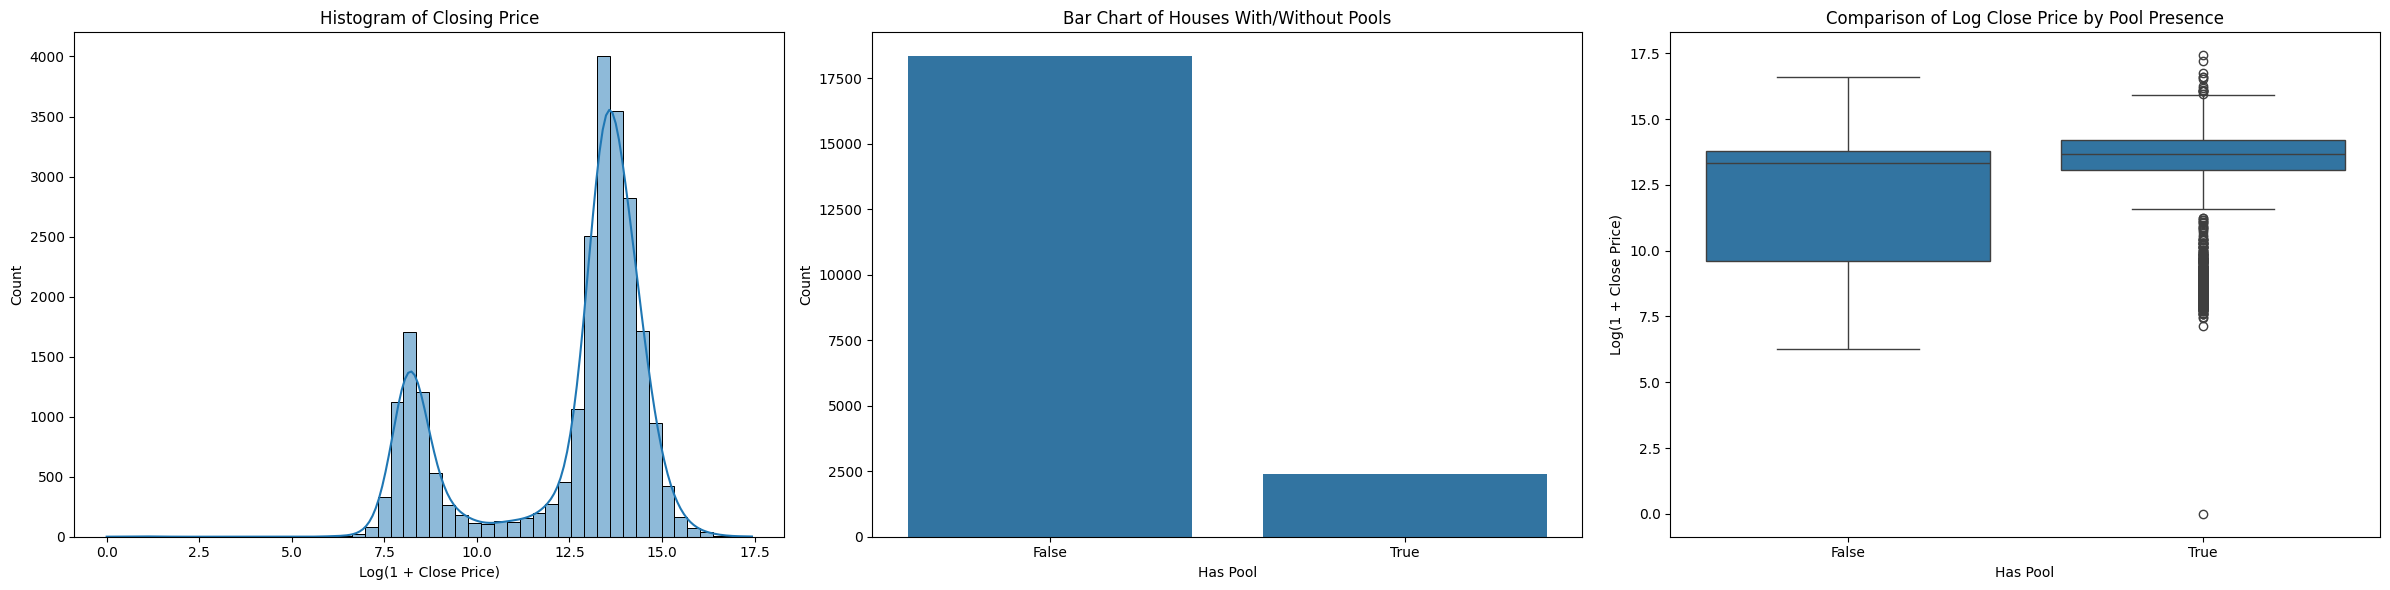

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

#take the log to reduce skew
log_close_price = np.log1p(dfJun['ClosePrice'])
sns.histplot(log_close_price, bins=50, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Closing Price')
axes[0].set_xlabel('Log(1 + Close Price)')

sns.countplot(x='PoolPrivateYN', data=dfJun, order=dfJun['PoolPrivateYN'].value_counts().index, ax=axes[1])
axes[1].set_title('Bar Chart of Houses With/Without Pools')
axes[1].set_xlabel('Has Pool')
axes[1].set_ylabel('Count')

sns.boxplot(x='PoolPrivateYN', y=log_close_price, data=dfJun, ax=axes[2])
axes[2].set_title('Comparison of Log Close Price by Pool Presence')
axes[2].set_xlabel('Has Pool')
axes[2].set_ylabel('Log(1 + Close Price)')

plt.tight_layout()
plt.show()

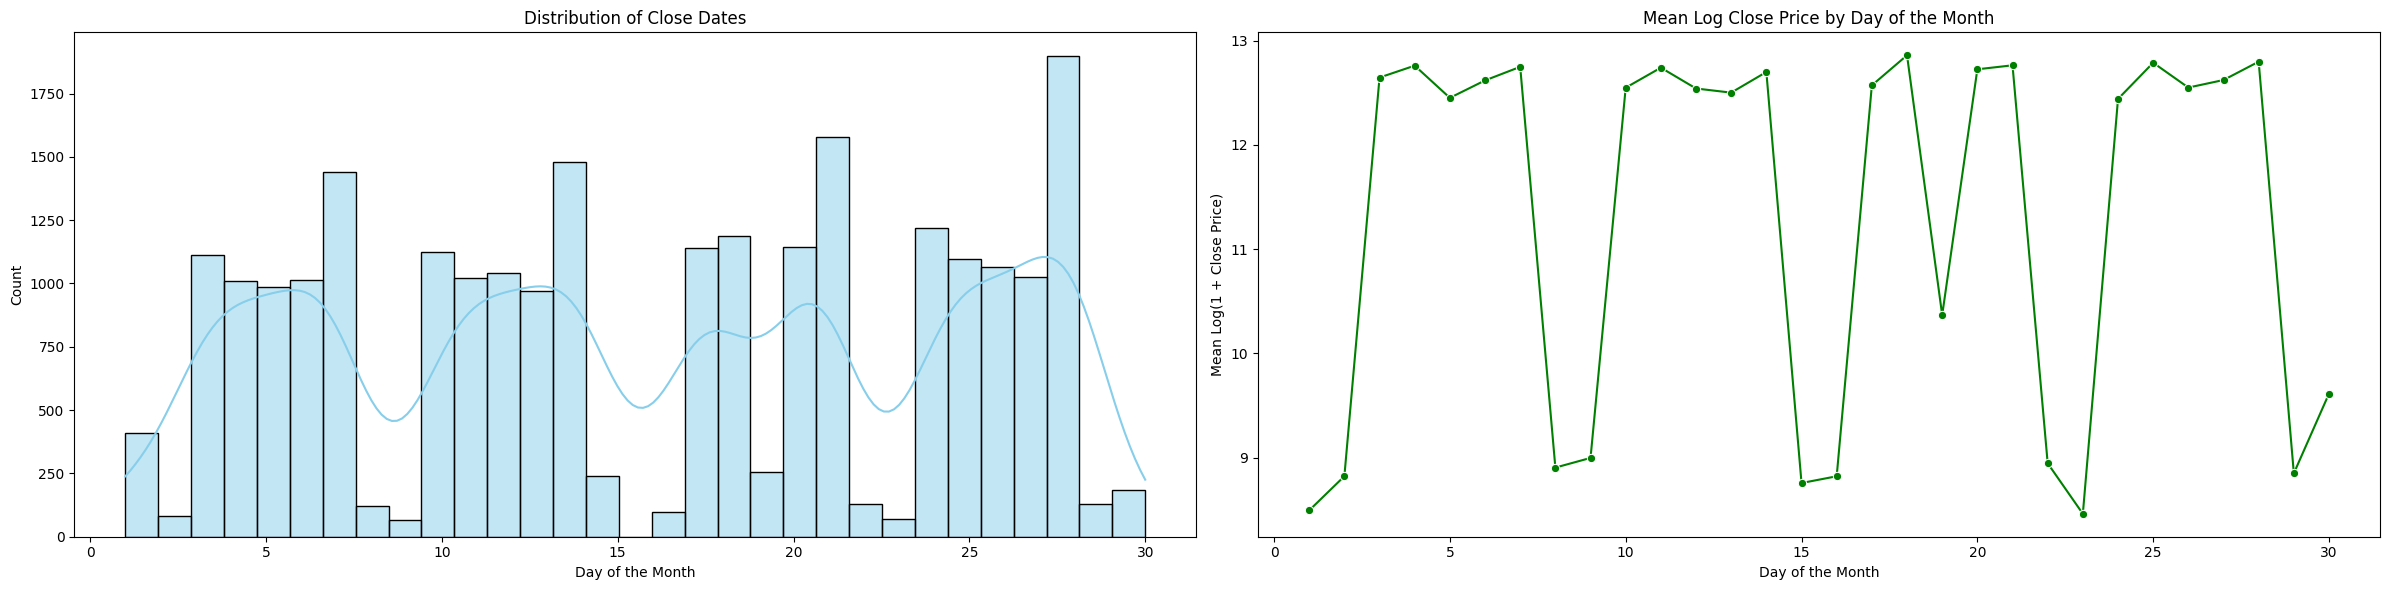

In [26]:
dfJun['CloseDate'] = pd.to_datetime(dfJun['CloseDate'])
dfJun['Day'] = dfJun['CloseDate'].dt.day
dfJun['LogClosePrice'] = np.log1p(dfJun['ClosePrice'])
df_mean = dfJun.groupby('Day')['LogClosePrice'].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

sns.histplot(dfJun['Day'], bins=31, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Close Dates')
axes[0].set_xlabel('Day of the Month')
axes[0].set_ylabel('Count')

sns.lineplot(x='Day', y='LogClosePrice', data=df_mean, marker='o', color='green', ax=axes[1])
axes[1].set_title('Mean Log Close Price by Day of the Month')
axes[1].set_xlabel('Day of the Month')
axes[1].set_ylabel('Mean Log(1 + Close Price)')

plt.tight_layout()
plt.show()

#I'm not that sure if I'm doing this right but it looks like not only do they sell 
# less houses on the weekend, they also sell cheaper houses on the weekend.

In [13]:
print(dfJun.columns)

Index(['BuyerAgentAOR', 'ListAgentAOR', 'Flooring', 'ViewYN', 'WaterfrontYN',
       'BasementYN', 'PoolPrivateYN', 'OriginalListPrice', 'ListingKey',
       'ListAgentEmail', 'CloseDate', 'ClosePrice', 'ListAgentFirstName',
       'ListAgentLastName', 'Latitude', 'Longitude', 'UnparsedAddress',
       'PropertyType', 'LivingArea', 'ListPrice', 'DaysOnMarket',
       'ListOfficeName', 'BuyerOfficeName', 'CoListOfficeName',
       'ListAgentFullName', 'CoListAgentFirstName', 'CoListAgentLastName',
       'BuyerAgentMlsId', 'BuyerAgentFirstName', 'BuyerAgentLastName',
       'FireplacesTotal', 'AssociationFeeFrequency', 'AboveGradeFinishedArea',
       'ListingKeyNumeric', 'MLSAreaMajor', 'TaxAnnualAmount',
       'CountyOrParish', 'MlsStatus', 'ElementarySchool', 'AttachedGarageYN',
       'ParkingTotal', 'BuilderName', 'PropertySubType', 'LotSizeAcres',
       'SubdivisionName', 'BuyerOfficeAOR', 'YearBuilt', 'StreetNumberNumeric',
       'ListingId', 'BathroomsTotalInteger', 'City', '